Computer Vision Object Dectection

Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [ ]:
 import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [ ]:
subscription_key = ''
vision_base_url = ''

In [ ]:
analyze_url = vision_base_url + 'analyze' #이미지 분석을 하기위한 주소가 됨

분석에 사용되는 이미지를 확인 합니다.

In [ ]:
image_url = 'https://previews.123rf.com/images/erix2005/erix20051611/erix2005161101164/69515606-%EC%84%9C%EC%9A%B8-%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD-2016-%EB%85%84-3-%EC%9B%94-14-%EC%9D%BC-%EC%84%9C%EC%9A%B8-%EB%AA%85%EB%8F%99-%EA%B8%B8%EA%B1%B0%EB%A6%AC%EC%97%90%EC%84%9C-%EC%A7%80%EB%82%98%EA%B0%80%EB%8A%94-%ED%95%9C%EA%B5%AD%EC%9D%B8.jpg'

In [ ]:
con = requests.get(image_url).content
byte = BytesIO(con)   #이미지를 풀어서 메모리에 올려줌
image = Image.open(byte)

image = Image.open(BytesIO(requests.get(image_url).content))

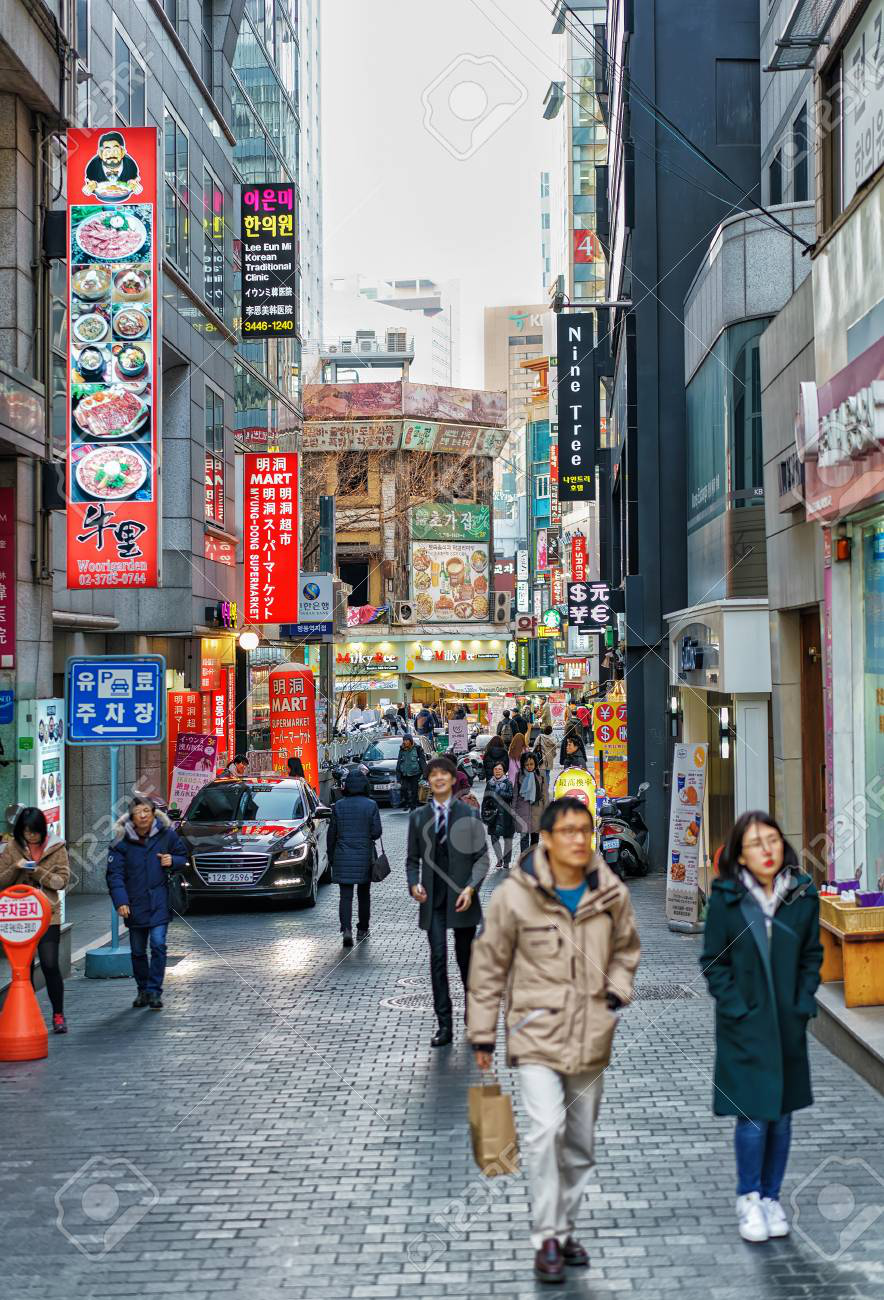

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}   #줄을 꼭 맞춰야 하진 않지만
data = {'url' : image_url}   #실제 분석에 들어갈 이미지의 주소

In [ ]:
response = requests.post(analyze_url, headers = headers, params = params, json = data)  #웹 호출 get or
result = response.json()

In [ ]:
result

{'categories': [{'name': 'outdoor_street',
   'score': 0.9296875,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey', 'White'],
  'accentColor': '894E42',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['building',
   'outdoor',
   'street',
   'scene',
   'sidewalk',
   'walking',
   'city',
   'car',
   'people',
   'holding',
   'small',
   'standing',
   'woman',
   'many',
   'rain',
   'group',
   'busy',
   'traffic',
   'young',
   'store',
   'man',
   'rainy',
   'parked',
   'umbrella',
   'sign',
   'tall',
   'riding'],
  'captions': [{'text': 'a group of people walking on a city street',
    'confidence': 0.9809796283735408}]},
 'requestId': 'eba11f0d-6693-4bb4-a8ce-6ba8c22f9b74',
 'metadata': {'height': 1300, 'width': 884, 'format': 'Jpeg'}}

json값 뽑아내서 사용하는 방법

In [ ]:
#{ }1개,[1,2,3...][1] [1,2.3...]여러개 중 [1]을 가져오겠다

image_caption = result['description']['captions'][0]['text']

In [ ]:
image_caption

'a group of people walking on a city street'

Object Detection 

In [ ]:
objectDetection_url = vision_base_url + 'detect'

In [ ]:
image_url = 'https://mblogthumb-phinf.pstatic.net/20151124_140/gatoblancokr_14483451465787xwfe_JPEG/2015-11-24_14%3B59%3B08_copy.jpg?type=w2'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

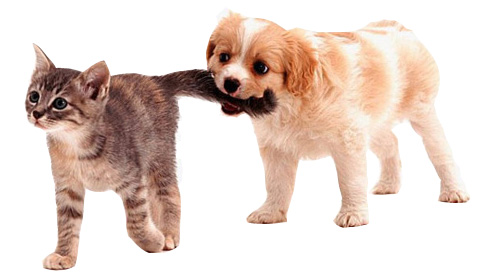

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key':subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}   #줄을 꼭 맞춰야 하진 않지만
data = {'url' : image_url}   #실제 분석에 들어갈 이미지의 주소

In [ ]:
response = requests.post(objectDetection_url, headers = headers, params = params, json = data)

In [ ]:
result = response.json()

In [ ]:
result

{'objects': [{'rectangle': {'x': 19, 'y': 39, 'w': 211, 'h': 227},
   'object': 'cat',
   'confidence': 0.865,
   'parent': {'object': 'mammal',
    'confidence': 0.882,
    'parent': {'object': 'animal', 'confidence': 0.882}}},
  {'rectangle': {'x': 202, 'y': 12, 'w': 274, 'h': 217},
   'object': 'dog',
   'confidence': 0.903,
   'parent': {'object': 'mammal',
    'confidence': 0.942,
    'parent': {'object': 'animal', 'confidence': 0.943}}}],
 'requestId': 'a8cb0ea7-f356-4244-bbf3-14e718545ebb',
 'metadata': {'height': 279, 'width': 477, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)    
#위에서 불러온 패키지 이름이 ImageDraw
#이미지를 그리기 모드로 여는 명령어

In [ ]:
# boundingBox를 위한 함수
def DrawBox(detectData):
  objects = detectData['objects']

  for obj in objects:     #안에 있는 요소의 수 만큼 반복. 요소2개.
    #print(obj)               #요소 전체 출력

    rect = obj['rectangle']   #좌표 뽑아내기
    print(rect)

    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red')    #사각형 그리기 ((첫번째 꼭지점), (두번째 꼭지점))

    objectName = obj['object']
    draw.text((x,y),objectName,fill='red')       #원하는 곳에 글자쓰기 가능

In [ ]:
DrawBox(result)  #result가 파라메터로 들어옴

{'x': 19, 'y': 39, 'w': 211, 'h': 227}
{'x': 202, 'y': 12, 'w': 274, 'h': 217}


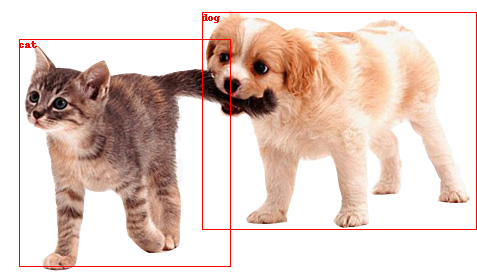

In [ ]:
image

여기까지 object detection